In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [3]:
""" credits of dataset https://github.com/hsjeong5/MNIST-for-Numpy """
def load():
    with open("/content/drive/MyDrive/MNIST/mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
x_train, y_train, x_test, y_test = load()

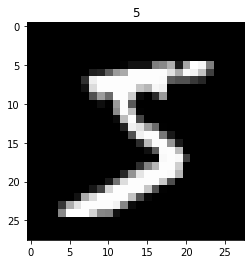

In [4]:
# sample image
img = x_train[0,:].reshape(28,28)
plt.title(str(y_train[0]))
plt.imshow(img,cmap='gray')
plt.show()

In [5]:
# converts y_train, y_test to one hot encoded outputs
def convert(y):
    x = np.zeros((10,y.size))
    x[y,np.arange(y.size)] = 1
    return x
print("x_train",x_train.shape,"y_train",y_train.shape,"x_test",x_test.shape,"y_test",y_test.shape)
y_train,y_test = convert(y_train), convert(y_test)
x_train, x_test = x_train.T, x_test.T
print("x_train",x_train.shape,"y_train",y_train.shape,"x_test",x_test.shape,"y_test",y_test.shape)

x_train (60000, 784) y_train (60000,) x_test (10000, 784) y_test (10000,)
x_train (784, 60000) y_train (10, 60000) x_test (784, 10000) y_test (10, 10000)


In [6]:
# relu activation function 
def ReLU(X):
    X[X<0] = 0
    return X
# backpropagation through relu
def ReLU_Backward(dA,Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <0] = 0
    dZ.squeeze()
    return dZ


def SoftMax(X):
    s = np.exp(X)
    total = np.sum(s,axis = 0)
    return (s/total)


# initializes the parameters
def InitializeParameters(n0,n1,n2,nl):
    """
    n0 = input layers, it's the 0th layer
    n1 = no. of hidden units in 1st layer
    n2 = no. of hidden units in 2nd layer
    nl = no. of hidden units in last layer

    """
    W1 = np.random.randn(n1,n0)*0.01
    b1 = np.random.randn(n1,1)

    W2 = np.random.randn(n2,n1)*0.01
    b2 = np.random.randn(n2,1)

    W3 = np.random.randn(nl,n2)*0.01
    b3 = np.random.randn(nl,1)

    Parameters = {"W1":W1,"b1":b1,"W2":W2,"b2":b2,"W3":W3, "b3": b3}

    return Parameters

# forward pass
def Forward(x,Parameters):
    """
    Does a forward pass
    """
    W1,b1 = Parameters["W1"],Parameters["b1"]
    W2,b2 = Parameters["W2"],Parameters["b2"]
    W3,b3 = Parameters["W3"],Parameters["b3"]

    Z1 = np.matmul(W1,x) + b1
    A1 = ReLU(Z1)

    Z2 = np.matmul(W2,Z1) + b2
    A2 = ReLU(Z2)

    Z3 = np.matmul(W3,Z2) + b3
    y_pred = SoftMax(Z3)
    caches = {"A0" : x_train,
              "A1" : A1,
              "A2" : A2,
              "A3" : y_pred,
              "Z1" : Z1,
              "Z2" : Z2,
              "Z3" : Z3}

    return y_pred, caches

# cross entropy loss
def Loss(y_pred,y_true):
    loss_vectr = (np.log(y_pred) * y_true).sum(axis = 0)
    return -np.mean(loss_vectr)

# backprop
def BackPropagate_and_UpdateWeights(x_train,y_train, Parameters, caches, learning_rate = 0.001):
    
    W1,b1 = Parameters["W1"],Parameters["b1"]
    W2,b2 = Parameters["W2"],Parameters["b2"]
    W3,b3 = Parameters["W3"],Parameters["b3"]

    A0 = caches["A0"]
    A1 = caches["A1"]
    A2 = caches["A2"]
    A3 = caches["A3"]
    Z1 = caches["Z1"]
    Z2 = caches["Z2"]
    Z3 = caches["Z3"]

    dZ3 = A3 - y_train
    
    db3 = (1/A3.shape[1])*np.sum(dZ3, axis = 1).reshape((A3.shape[0],1)) 
    dW3 = (1/A3.shape[1])* np.matmul(dZ3,A2.T)

    dA2 = np.matmul(W3.T,dZ3)
    dZ2 = ReLU_Backward(dA2,Z2)

    db2 = (1/A2.shape[1])*np.sum(dZ2, axis = 1).reshape((A2.shape[0],1))
    dW2 = (1/A2.shape[1])*np.matmul(dZ2,A1.T)

    dA1 = np.matmul(W2.T,dZ2)
    dZ1 = ReLU_Backward(dA1,Z2)

    db1 = (1/A1.shape[1])*np.sum(dZ1, axis = 1).reshape((A1.shape[0],1))
    dW1 = (1/A1.shape[1])*np.matmul(dZ1,A0.T)

    Parameters["W1"] -= dW1*learning_rate
    Parameters["b1"] -= db1*learning_rate

    Parameters["W2"] -= dW2*learning_rate
    Parameters["b2"] -= db2*learning_rate

    Parameters["W3"] -= dW3*learning_rate
    Parameters["b3"] -= db3*learning_rate

def Accuracy(y_pred,y_true):
    y_pred_result = np.argmax(y_pred,axis = 0)
    y_true_result = np.argmax(y_true,axis = 0)
    correct = np.sum(y_pred_result==y_true_result)
    total = y_true.shape[1]
    return (correct, total)


In [7]:
Parameters = InitializeParameters(784,512,512,10)

epoch: 1 	loss 1.220102 	correct 44129/60000
epoch: 2 	loss 1.190399 	correct 44585/60000
epoch: 3 	loss 1.162320 	correct 44979/60000
epoch: 4 	loss 1.135757 	correct 45358/60000
epoch: 5 	loss 1.110605 	correct 45688/60000
epoch: 6 	loss 1.086771 	correct 46007/60000
epoch: 7 	loss 1.064169 	correct 46282/60000
epoch: 8 	loss 1.042718 	correct 46535/60000
epoch: 9 	loss 1.022340 	correct 46756/60000
epoch: 10 	loss 1.002966 	correct 46962/60000
epoch: 11 	loss 0.984531 	correct 47149/60000
epoch: 12 	loss 0.966973 	correct 47349/60000
epoch: 13 	loss 0.950238 	correct 47520/60000
epoch: 14 	loss 0.934272 	correct 47688/60000
epoch: 15 	loss 0.919028 	correct 47865/60000
epoch: 16 	loss 0.904460 	correct 48029/60000
epoch: 17 	loss 0.890525 	correct 48150/60000
epoch: 18 	loss 0.877186 	correct 48296/60000
epoch: 19 	loss 0.864406 	correct 48424/60000
epoch: 20 	loss 0.852154 	correct 48558/60000
train accuracy 81.143333
test accuracy 82.110000


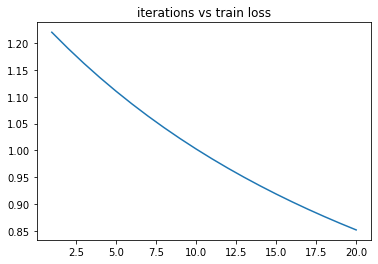

In [9]:
learning_rate = 0.001
epochs = 20
losses = []
for epoch in range(epochs):
    y_pred, caches = Forward(x_train,Parameters)
    BackPropagate_and_UpdateWeights(x_train,y_train, Parameters, caches, learning_rate)
    losses.append(Loss(y_pred,y_train))
    correct, total = Accuracy(y_pred,y_train)
    print("epoch:",epoch+1,"\tloss","{0:.6f}".format(losses[-1]),"\tcorrect",str(correct)+"/"+str(total))


y_train_pred,_ = Forward(x_train,Parameters)
correct,total = Accuracy(y_train_pred,y_train)
print("train accuracy", "{0:.6f}".format(100*correct/total))
y_test_pred,_ = Forward(x_test,Parameters)
correct,total = Accuracy(y_test_pred,y_test)
print("test accuracy","{0:.6f}".format(100*correct/total))
iters = [i+1 for i in range(epochs)]
plt.plot(iters,losses)
plt.title('iterations vs train loss')
plt.show()

References:
https://www.deeplearning.ai/,
https://www.kaggle.com/scaomath/simple-mnist-numpy-from-scratch?select=train.csv, https://stackoverflow.com/questions/40575841/numpy-calculate-the-derivative-of-the-softmax-function

